In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fem_act= pd.read_csv('Femact.csv')
fem_temp= pd.read_csv('Femtemp.csv')
mal_act=pd.read_csv('Maleact.csv')
mal_temp=pd.read_csv('Maletemp.csv')

In [3]:
fem_act = fem_act.melt(var_name="Mouse", value_name="Activity")
fem_temp = fem_temp.melt(var_name="Mouse", value_name="Temperature")
mal_act = mal_act.melt(var_name="Mouse", value_name="Activity")
mal_temp = mal_temp.melt(var_name="Mouse", value_name="Temperature")


time_steps = len(fem_act) // len(fem_act["Mouse"].unique())
fem_act["Time"] = np.tile(np.arange(1, time_steps + 1), len(fem_act["Mouse"].unique()))
fem_temp["Time"] = fem_act["Time"]
mal_act["Time"] = fem_act["Time"]
mal_temp["Time"] = fem_act["Time"]

# (0 = Light, 1 = Dark)
fem_act["Phase"] = (fem_act["Time"] // 720) % 2  # 12 hours = 720 minutes
mal_act["Phase"] = fem_act["Phase"]


In [4]:
fem_activity_phase = fem_act.groupby("Phase")["Activity"].mean()
mal_activity_phase = mal_act.groupby("Phase")["Activity"].mean()

activity_comparison = pd.DataFrame({
    "Female": fem_activity_phase,
    "Male": mal_activity_phase
}).reset_index()

activity_comparison.head()


,Phase,Female,Male
0,0,33.832429,37.062080
1,1,10.738674,12.960041


<Figure size 800x600 with 0 Axes>

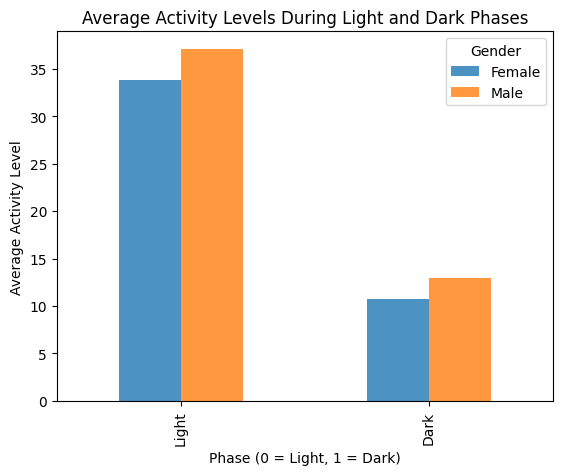

In [5]:
# Plot grouped bar chart
plt.figure(figsize=(8, 6))
activity_comparison.plot(x="Phase", kind="bar", color=["#1f77b4", "#ff7f0e"], alpha=0.8)
plt.title("Average Activity Levels During Light and Dark Phases")
plt.xlabel("Phase (0 = Light, 1 = Dark)")
plt.ylabel("Average Activity Level")
plt.xticks(ticks=[0, 1], labels=["Light", "Dark"])
plt.legend(title="Gender")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


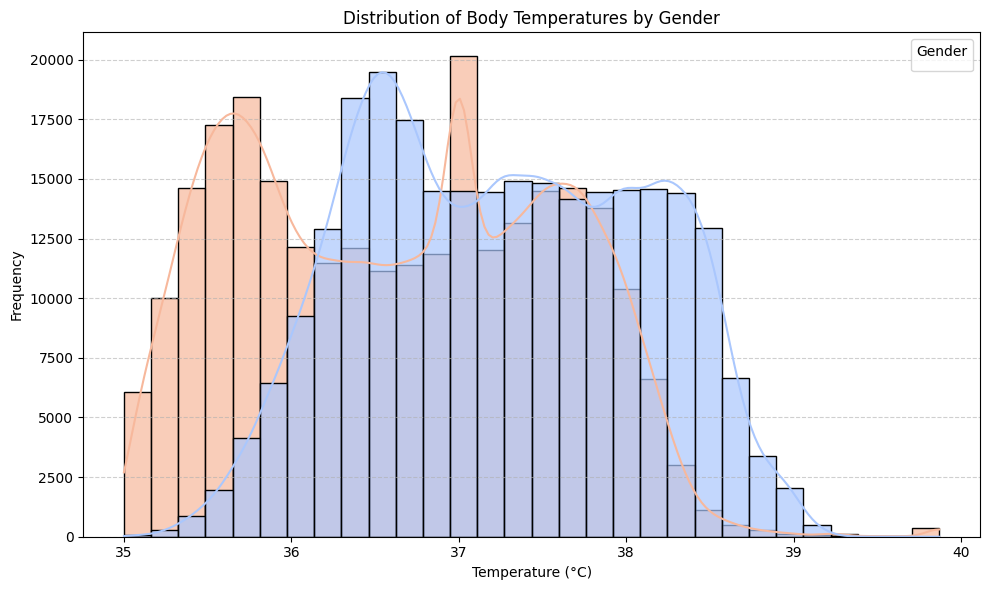

In [6]:
temperature_data = pd.concat([
    fem_temp.assign(Gender="Female"),
    mal_temp.assign(Gender="Male")
])

# Plot histogram and density for temperature variability
plt.figure(figsize=(10, 6))
sns.histplot(data=temperature_data, x="Temperature", hue="Gender", kde=True, bins=30, palette="coolwarm", alpha=0.7)
plt.title("Distribution of Body Temperatures by Gender")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


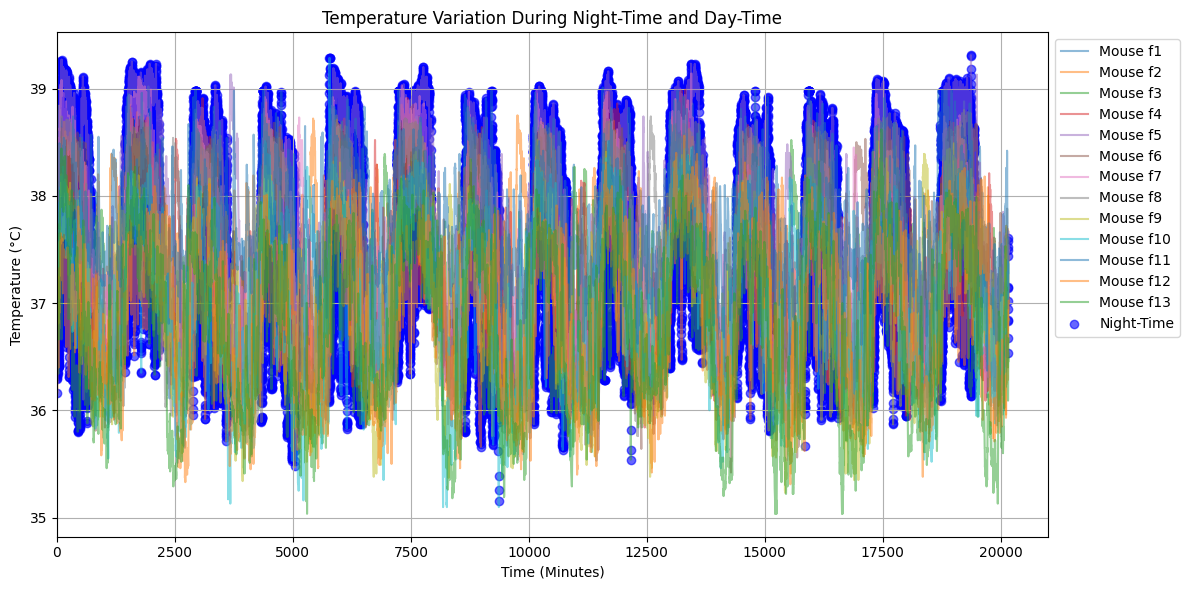

In [7]:
plt.figure(figsize=(12, 6))

# Plot each mouse's temperature
for mouse in fem_temp["Mouse"].unique():
    temp_data = fem_temp[fem_temp["Mouse"] == mouse]
    plt.plot(temp_data["Time"], temp_data["Temperature"], label=f"Mouse {mouse}", alpha=0.5)

# Identify night-time periods (every 12 hours = 720 minutes)
night_time = fem_temp[fem_temp["Time"] % 1440 < 720]  # First 720 minutes of each day = night

# Highlight night-time periods
plt.scatter(night_time["Time"], night_time["Temperature"], color="blue", alpha=0.6, label="Night-Time")

# Titles and labels
plt.title("Temperature Variation During Night-Time and Day-Time")
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (°C)")

# Adjust the x-axis limit
plt.xlim(0, 21000)  # Set the x-axis range to accommodate the data

# Move the legend off the graph
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Additional settings
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

/var/folders/c4/cdh145y55c14z2653njv_fq80000gn/T/ipykernel_27557/80152590.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=light_data, x="Gender", y="Activity", ax=axes[0], palette={"Female": "blue", "Male": "orange"})
/var/folders/c4/cdh145y55c14z2653njv_fq80000gn/T/ipykernel_27557/80152590.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dark_data, x="Gender", y="Activity", ax=axes[1], palette={"Female": "blue", "Male": "orange"})


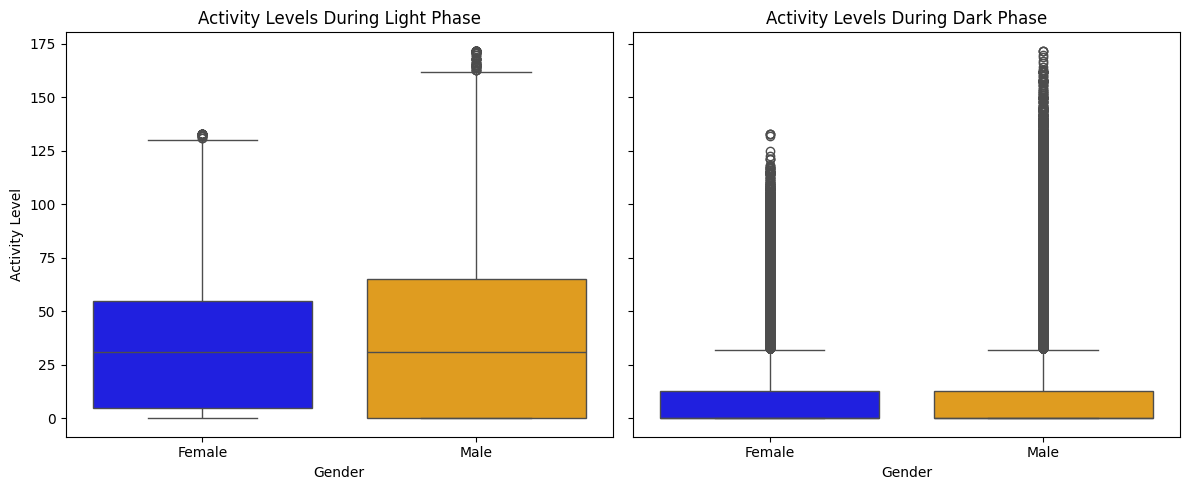

In [8]:
# Add "Time" column (1440 minutes per day over 14 days)
time_steps = len(fem_act) // len(fem_act["Mouse"].unique())
fem_act["Time"] = np.tile(np.arange(1, time_steps + 1), len(fem_act["Mouse"].unique()))
mal_act["Time"] = np.tile(np.arange(1, time_steps + 1), len(mal_act["Mouse"].unique()))

# Separate data into light and dark phases
light_phase_female = fem_act[fem_act["Time"] % 1440 < 720]
dark_phase_female = fem_act[fem_act["Time"] % 1440 >= 720]

light_phase_male = mal_act[mal_act["Time"] % 1440 < 720]
dark_phase_male = mal_act[mal_act["Time"] % 1440 >= 720]

# Combine male and female datasets for each phase
light_data = pd.concat([light_phase_female.assign(Gender="Female"), light_phase_male.assign(Gender="Male")])
dark_data = pd.concat([dark_phase_female.assign(Gender="Female"), dark_phase_male.assign(Gender="Male")])

# Create subplots for Light and Dark phases
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Light Phase
sns.boxplot(data=light_data, x="Gender", y="Activity", ax=axes[0], palette={"Female": "blue", "Male": "orange"})
axes[0].set_title("Activity Levels During Light Phase")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Activity Level")

# Plot Dark Phase
sns.boxplot(data=dark_data, x="Gender", y="Activity", ax=axes[1], palette={"Female": "blue", "Male": "orange"})
axes[1].set_title("Activity Levels During Dark Phase")
axes[1].set_xlabel("Gender")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

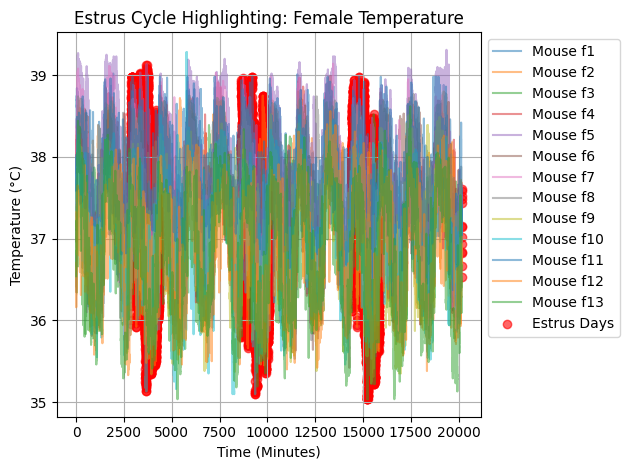

In [9]:
fem_temp["Estrus"] = ((fem_temp["Time"] // 1440) % 4 == 2).astype(int)  
fem_act["Estrus"] = fem_temp["Estrus"] 
for mouse in fem_temp["Mouse"].unique():
    temp_data = fem_temp[fem_temp["Mouse"] == mouse]
    plt.plot(temp_data["Time"], temp_data["Temperature"], label=f"Mouse {mouse}", alpha=0.5)

estrus_days = fem_temp[fem_temp["Estrus"] == 1]
plt.scatter(estrus_days["Time"], estrus_days["Temperature"], color="red", alpha=0.6, label="Estrus Days")
plt.title("Estrus Cycle Highlighting: Female Temperature")
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (°C)")
# Move the legend off the graph
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

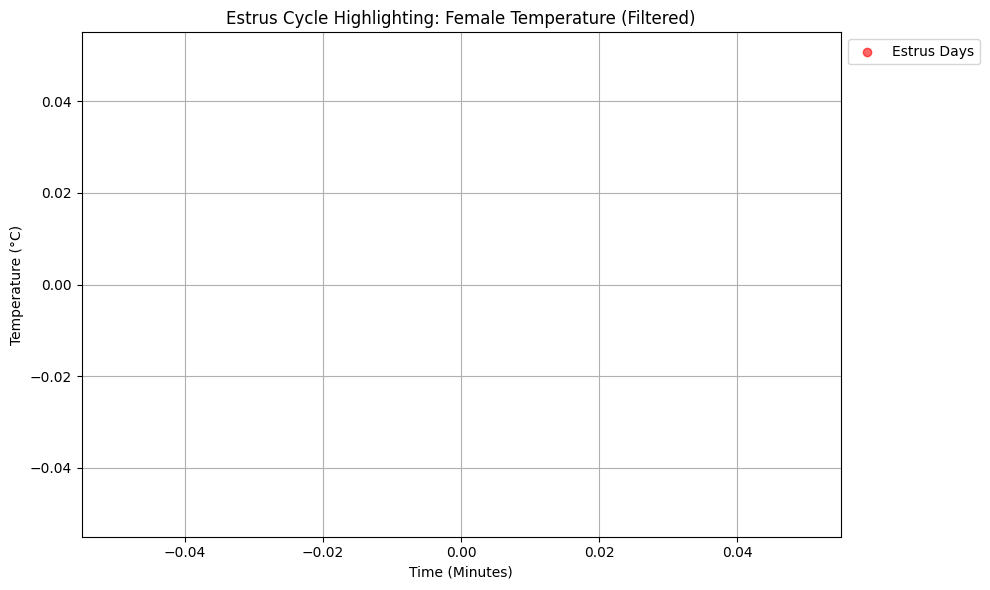

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming fem_temp is your DataFrame
fem_temp["Estrus"] = ((fem_temp["Time"] // 1440) % 4 == 2).astype(int)  
fem_act["Estrus"] = fem_temp["Estrus"] 

# Identify mice whose average temperature is higher during estrus
selected_mice = []
for mouse in fem_temp["Mouse"].unique():
    temp_data = fem_temp[fem_temp["Mouse"] == mouse]
    mean_temp_estrus = temp_data[temp_data["Estrus"] == 1]["Temperature"].mean()
    mean_temp_non_estrus = temp_data[temp_data["Estrus"] == 0]["Temperature"].mean()
    
    # Select mice where estrus temperature is higher
    if mean_temp_estrus > mean_temp_non_estrus:
        selected_mice.append(mouse)

# Plot only selected mice
plt.figure(figsize=(10, 6))
for mouse in selected_mice:
    temp_data = fem_temp[fem_temp["Mouse"] == mouse]
    plt.plot(temp_data["Time"], temp_data["Temperature"], label=f"Mouse {mouse}", alpha=0.5)

# Highlight estrus days
estrus_days = fem_temp[(fem_temp["Estrus"] == 1) & (fem_temp["Mouse"].isin(selected_mice))]
plt.scatter(estrus_days["Time"], estrus_days["Temperature"], color="red", alpha=0.6, label="Estrus Days")

# Plot settings
plt.title("Estrus Cycle Highlighting: Female Temperature (Filtered)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (°C)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
fem_temp

,Mouse,Temperature,Time,Estrus
0,f1,37.11,1,0
1,f1,37.13,2,0
2,f1,37.19,3,0
3,f1,37.20,4,0
4,f1,37.22,5,0
...,...,...,...,...
262075,f13,36.37,20156,0
262076,f13,36.48,20157,0
262077,f13,36.56,20158,0
262078,f13,36.65,20159,0


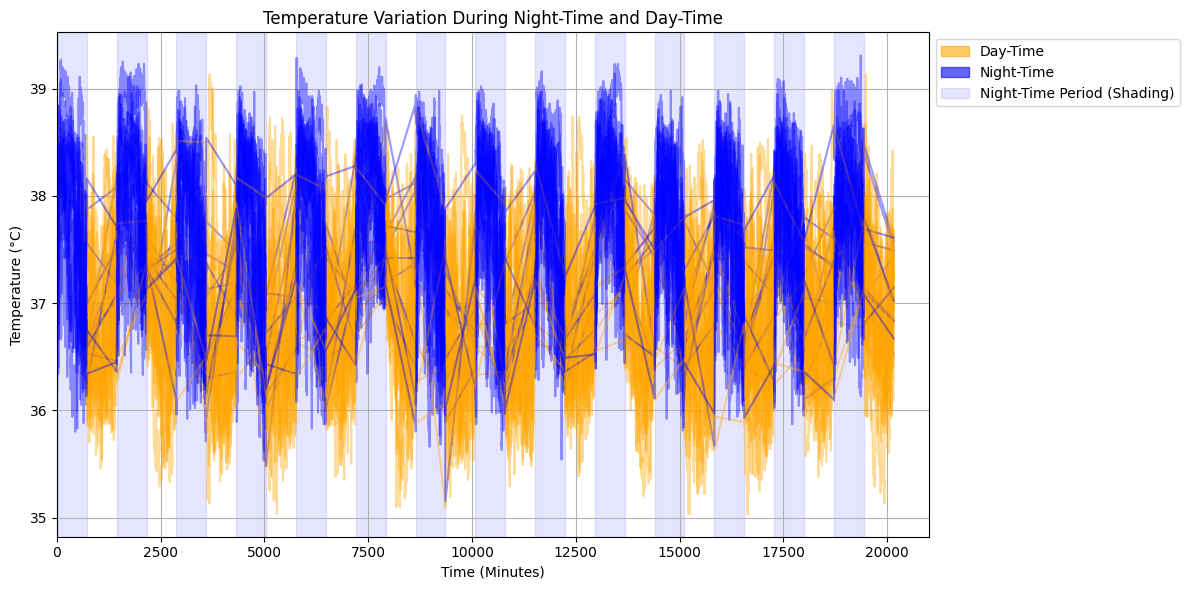

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))

# Iterate through each mouse
for mouse in fem_temp["Mouse"].unique():
    temp_data = fem_temp[fem_temp["Mouse"] == mouse]
    
    # Apply night-time condition within the subset
    night_mask = temp_data["Time"] % 1440 < 720  # First 720 minutes of each day = night
    day_mask = ~night_mask  # The rest is day-time

    # Plot day-time in orange
    plt.plot(temp_data[day_mask]["Time"], temp_data[day_mask]["Temperature"],
             color="orange", alpha=0.4)

    # Plot night-time in blue
    plt.plot(temp_data[night_mask]["Time"], temp_data[night_mask]["Temperature"],
             color="blue", alpha=0.4)

# Shade night-time periods
for i in range(0, int(fem_temp["Time"].max()), 1440):
    plt.axvspan(i, i + 720, color="blue", alpha=0.1)

# Titles and labels
plt.title("Temperature Variation During Night-Time and Day-Time")
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (°C)")

# Adjust x-axis limit
plt.xlim(0, 21000)

# Manually define legend entries
day_patch = mpatches.Patch(color="orange", alpha=0.6, label="Lights-On")
night_patch = mpatches.Patch(color="blue", alpha=0.6, label="Lights-Off")
shading_patch = mpatches.Patch(color="blue", alpha=0.1, label="Night-Time Period (Shading)")

# Add legend
plt.legend(handles=[day_patch, night_patch, shading_patch], loc="upper left", bbox_to_anchor=(1, 1))

# Additional settings
plt.grid(True)
plt.tight_layout()
plt.show()
